## **Training**

### **Linear Regression**

In [38]:
train_block_id = list(range(0, 446))
val_block_id = list(range(446, 542))
test_block_id = list(range(542, 638))

tr = df_dropped[df_dropped['data_block_id'].isin(train_block_id)] 
val = df_dropped[df_dropped['data_block_id'].isin(val_block_id)] 
test = df_dropped[df_dropped['data_block_id'].isin(test_block_id)] 

x_train = []
y_train = []
x_val = []
y_val = []

x_train = tr[features]
y_train = tr[target]
x_val = val[features]
y_val = val[target]
x_test = test[features]
y_test = test[target]

In [39]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 129.96174331471673


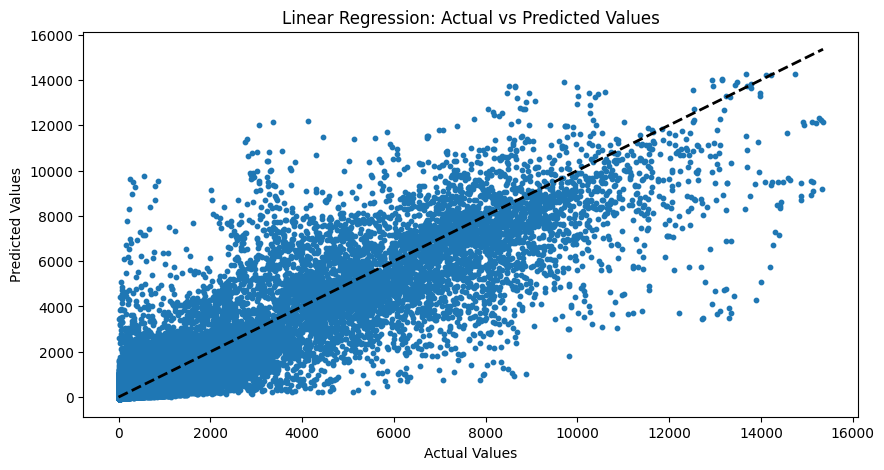

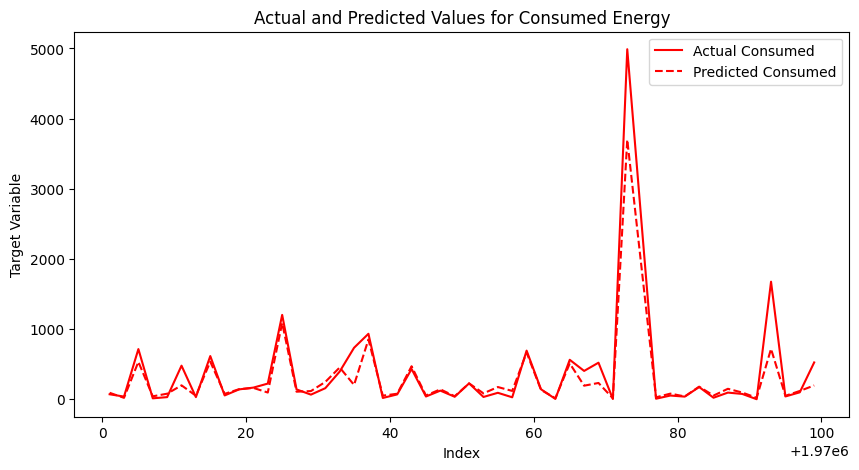

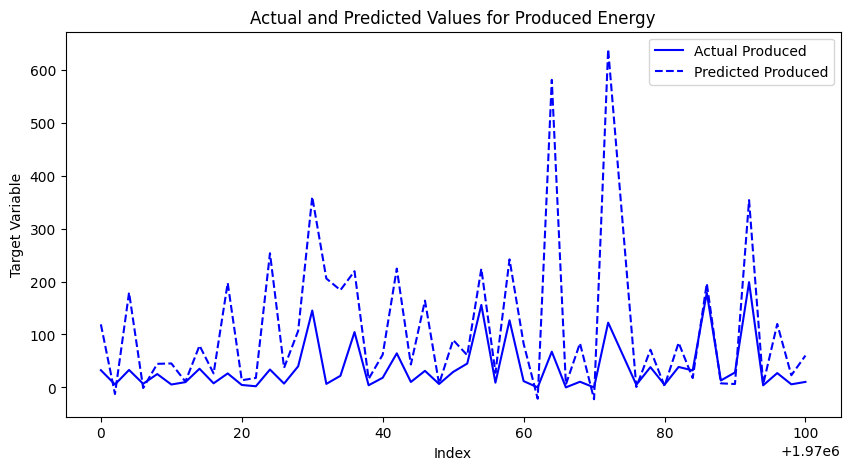

In [40]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=10)  # Scatter plot for actual vs predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.title('Linear Regression: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Choose the range of indices to focus on
start_index = 1.97e6  # Replace with your actual start index
end_index = 1.9701e6    # Replace with your actual end index

# Create a boolean mask for the consumed and produced energy within the specified range
consumed_range = (x_test['is_consumption'] == 1) & (y_test.index >= start_index) & (y_test.index <= end_index)
produced_range = (x_test['is_consumption'] == 0) & (y_test.index >= start_index) & (y_test.index <= end_index)

# Plot for consumed energy in the specified range
plt.figure(figsize=(10, 5))
plt.plot(y_test[consumed_range].index, y_test[consumed_range], 'r-', label='Actual Consumed')
plt.plot(y_test[consumed_range].index, y_pred[consumed_range], 'r--', label='Predicted Consumed')
plt.title('Actual and Predicted Values for Consumed Energy')
plt.xlabel('Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(y_test[produced_range].index, y_test[produced_range], 'b-', label='Actual Produced')
plt.plot(y_test[produced_range].index, y_pred[produced_range], 'b--', label='Predicted Produced')
plt.title('Actual and Predicted Values for Produced Energy')
plt.xlabel('Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()